In [1]:
# import packages 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import eli5
import shap

from sklearn.tree import DecisionTreeClassifier
from pdpbox import pdp, get_dataset, info_plots

plt.style.use('fivethirtyeight')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of th

In [2]:
#import dataset 
df = pd.read_csv('/content/drive/My Drive/第三个学期/ST635group/Dataset/cleaning.csv')
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df = pd.get_dummies(df,columns = ['education'])
df.head()

,male,age,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd,education_1.0,education_2.0,education_3.0,education_4.0
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,0,1
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,1,0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,0,0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,0,1,0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,0,1,0


In [0]:
x = df.drop(columns = 'tenyearchd')
y = df['tenyearchd']

In [5]:
dt = DecisionTreeClassifier(min_samples_leaf=30)
dt.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Feature Importance

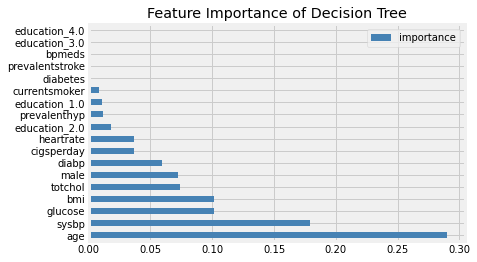

In [6]:
#visualiza feature importance 
feature_importance = pd.DataFrame(dt.feature_importances_,index = x.columns.to_list(),columns = ['importance'])
feature_importance.sort_values('importance',ascending = False,inplace = True)
feature_importance.plot(kind = 'barh',color = 'steelblue')
plt.title('Feature Importance of Decision Tree')
plt.show()

# eli5 

In [7]:
# permutation Importance Visualization 
perm = eli5.sklearn.PermutationImportance(dt,random_state=42).fit(x,y)
eli5.show_weights(perm, feature_names = x.columns.tolist())

Weight,Feature
0.0141 ± 0.0052,male
0.0124 ± 0.0021,sysbp
0.0061 ± 0.0019,age
0.0049 ± 0.0022,glucose
0.0032 ± 0.0022,totchol
0 ± 0.0000,heartrate
0 ± 0.0000,bmi
0 ± 0.0000,diabp
0 ± 0.0000,education_1.0
0 ± 0.0000,education_3.0


# PDP box

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


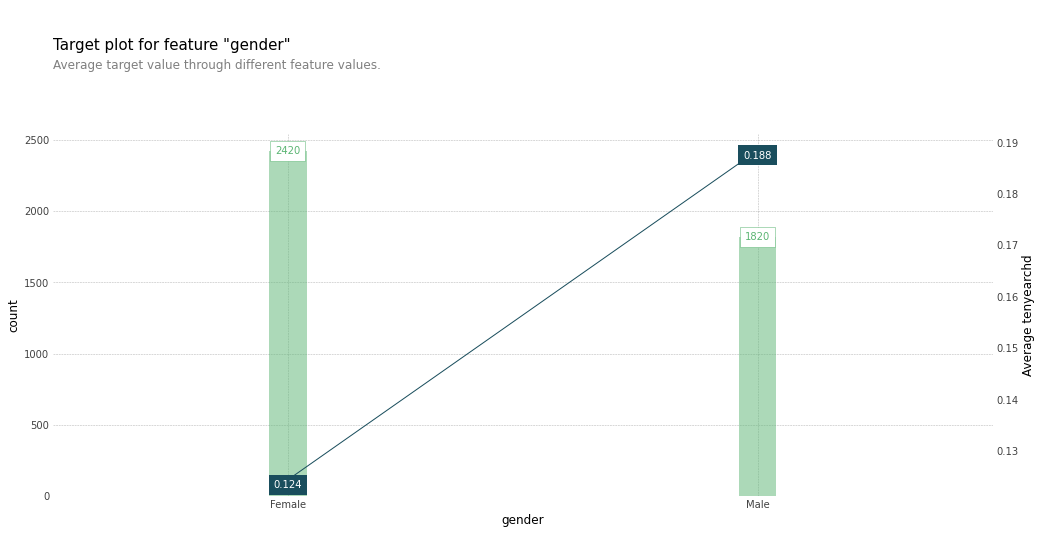

In [8]:
#  target distribution via feature male 
fig, axes, summary_df  = info_plots.target_plot(
    df,
    feature = 'male',
    feature_name = 'gender',
    target = 'tenyearchd')
_ = axes['bar_ax'].set_xticklabels(['Female', 'Male'])

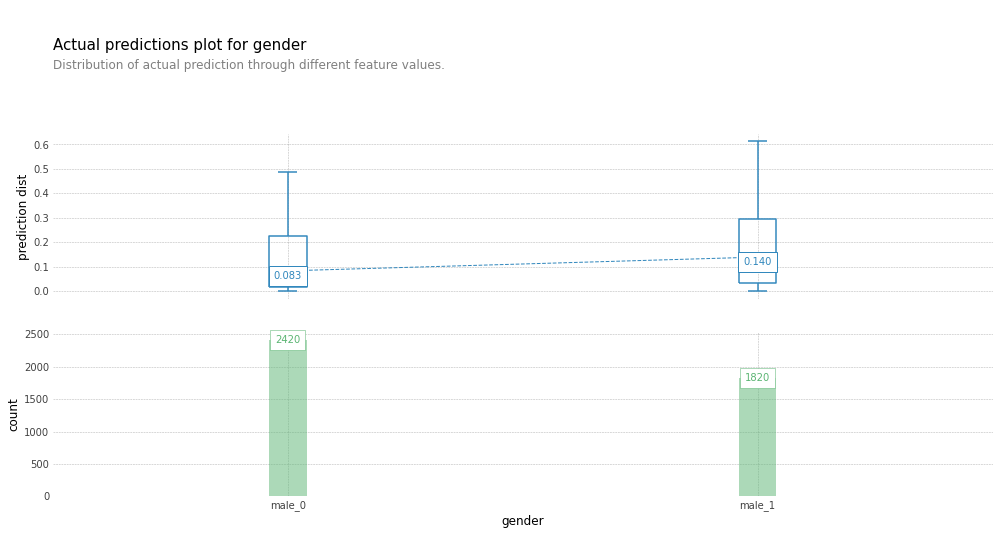

In [9]:
# prediction distribution 
fig, axes, summary_df = info_plots.actual_plot(
    model = dt,
    X = x,
    feature = 'male',
    feature_name = 'gender',
    predict_kwds={}
)

In [0]:
pdp_age = pdp.pdp_isolate(
    model = dt,
    dataset = df,
    model_features = x.columns.to_list(),
    feature = 'age'
)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f69344875c0>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6933f311d0>})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


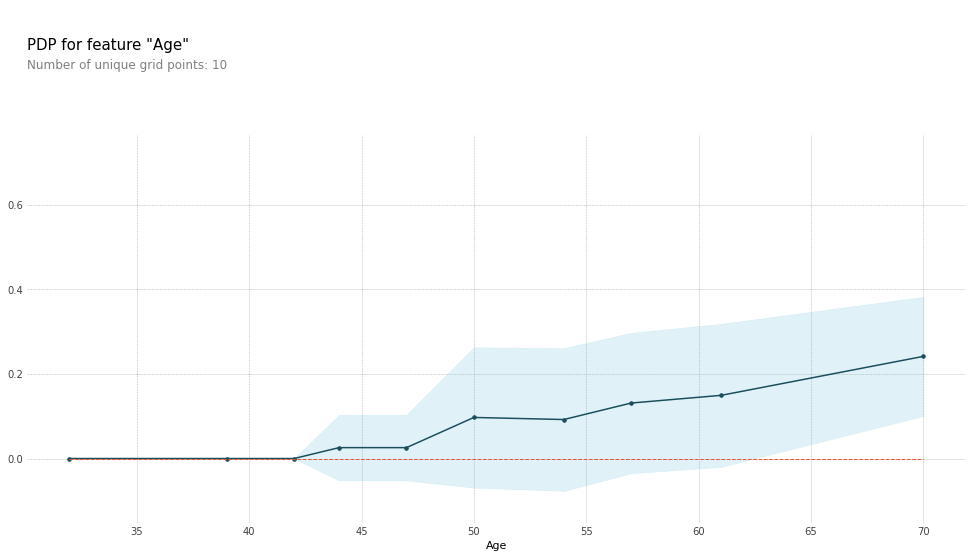

In [11]:
pdp.pdp_plot(pdp_age,'Age')

In [0]:
pdp_sex = pdp.pdp_isolate(
    model = dt,
    dataset = df,
    model_features = x.columns.to_list(),
    feature = 'male'
)

(<Figure size 1080x684 with 3 Axes>,
 {'pdp_ax': {'_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6932a4f7f0>,
   '_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6932aa0208>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f6933cfecf8>})

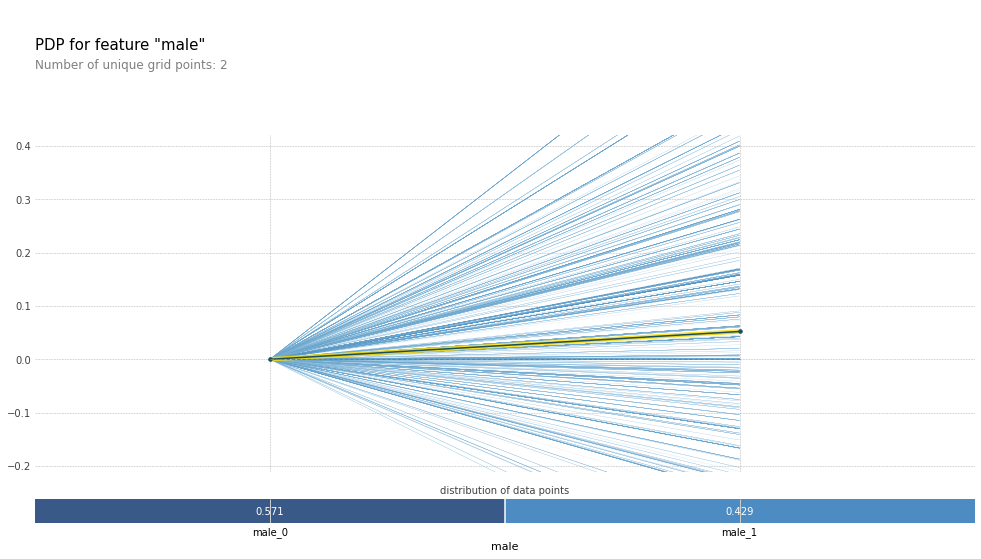

In [13]:
pdp.pdp_plot(pdp_sex,'male',plot_lines=True,plot_pts_dist=True)

(<Figure size 1080x648 with 3 Axes>,
 {'bar_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692f9c0b00>,
  'line_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692f975b00>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692f703748>},
    x display_column  count  tenyearchd
 0  0  education_1.0   1825    0.185753
 1  1  education_2.0   1253    0.117318
 2  2  education_3.0    689    0.127721
 3  3  education_4.0    473    0.147992)

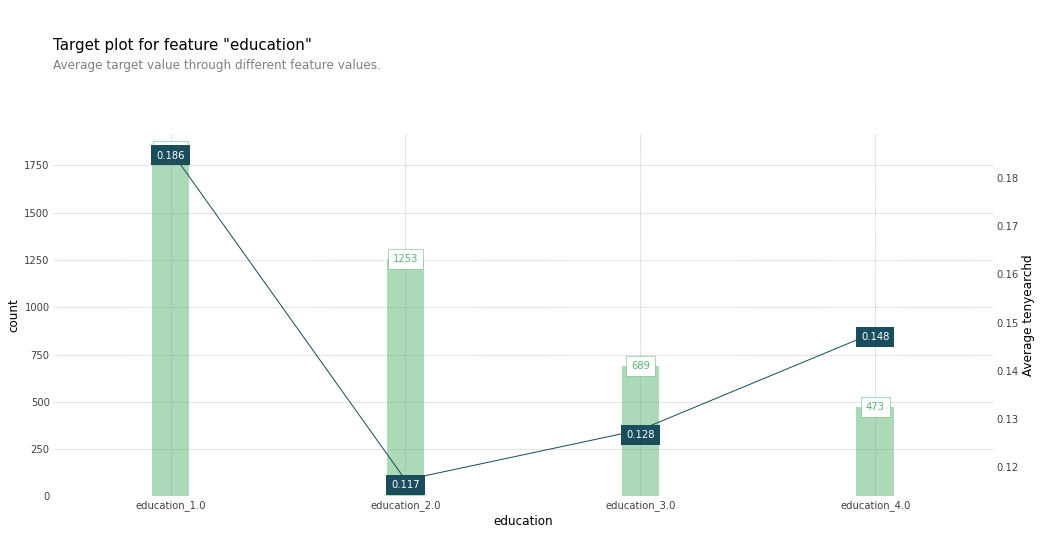

In [14]:
# dummy variable
info_plots.target_plot(
    df = df,
    feature = ['education_1.0','education_2.0','education_3.0','education_4.0'],
    feature_name = 'education',
    target = 'tenyearchd'
)

(<Figure size 1080x648 with 3 Axes>,
 {'bar_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692f88bbe0>,
  'box_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692f8e1518>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692f931128>},
    x display_column  ...  actual_prediction_q2  actual_prediction_q3
 0  0  education_1.0  ...              0.151515              0.292683
 1  1  education_2.0  ...              0.071429              0.209302
 2  2  education_3.0  ...              0.066667              0.224490
 3  3  education_4.0  ...              0.095238              0.214286
 
 [4 rows x 6 columns])

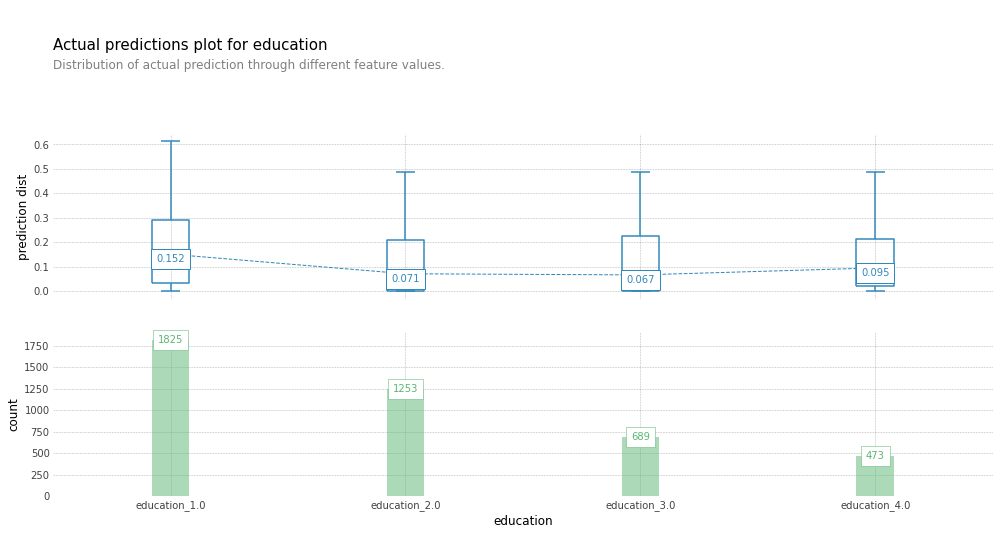

In [15]:
# prediction distribution 
info_plots.actual_plot(
    model = dt,
    X = x,
    feature = ['education_1.0','education_2.0','education_3.0','education_4.0'],
    feature_name = 'education',
    predict_kwds={}
)

(<Figure size 1080x648 with 4 Axes>,
 {'bar_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692f736898>,
  'line_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692f763f28>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692f7e3be0>},
    x display_column  value_lower  ...  percentile_upper count  tenyearchd
 0  0     [107, 185)        107.0  ...             11.11   436    0.121560
 1  1     [185, 202)        185.0  ...             22.22   476    0.088235
 2  2     [202, 216)        202.0  ...             33.33   497    0.158954
 3  3     [216, 229)        216.0  ...             44.44   459    0.141612
 4  4     [229, 239)        229.0  ...             55.56   449    0.144766
 5  5     [239, 252)        239.0  ...             66.67   491    0.144603
 6  6     [252, 267)        252.0  ...             77.78   477    0.180294
 7  7     [267, 290)        267.0  ...             88.89   483    0.173913
 8  8     [290, 696]        290.0  ...            100.00   472    0.209

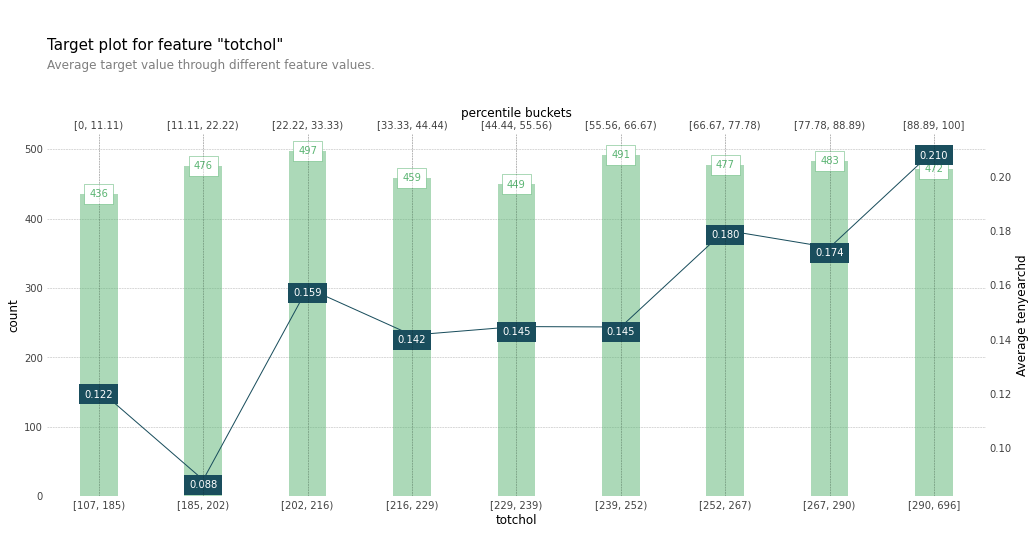

In [16]:
# numeric 
info_plots.target_plot(
    df, feature = 'totchol',
    feature_name = 'totchol',
    target = 'tenyearchd',
    show_percentile = True
)

(<Figure size 1080x648 with 4 Axes>,
 {'bar_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692b543b70>,
  'box_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692b5964a8>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692f82abe0>},
    x display_column  ...  actual_prediction_q2  actual_prediction_q3
 0  0     [107, 185)  ...              0.060606              0.160714
 1  1     [185, 202)  ...              0.060606              0.170213
 2  2     [202, 216)  ...              0.064516              0.214286
 3  3     [216, 229)  ...              0.071429              0.209302
 4  4     [229, 239)  ...              0.071429              0.229167
 5  5     [239, 252)  ...              0.122449              0.257143
 6  6     [252, 267)  ...              0.160714              0.292683
 7  7     [267, 290)  ...              0.156250              0.264935
 8  8     [290, 696]  ...              0.151515              0.292683
 
 [9 rows x 11 columns])

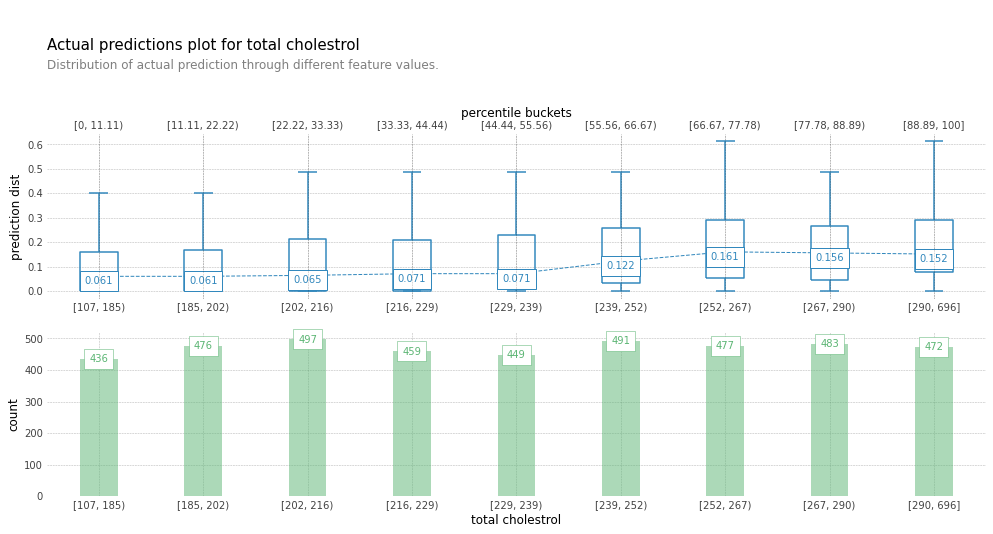

In [17]:
info_plots.actual_plot(
    model = dt,
    X = x,
    feature = 'totchol',
    feature_name = 'total cholestrol',
    show_percentile = True,
    predict_kwds ={}
)

In [0]:
pdp_totchol = pdp.pdp_isolate(
    model = dt,
    dataset = df,
    model_features = x.columns.to_list(),
    feature = 'totchol'
)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692b350f28>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692b3dc518>})

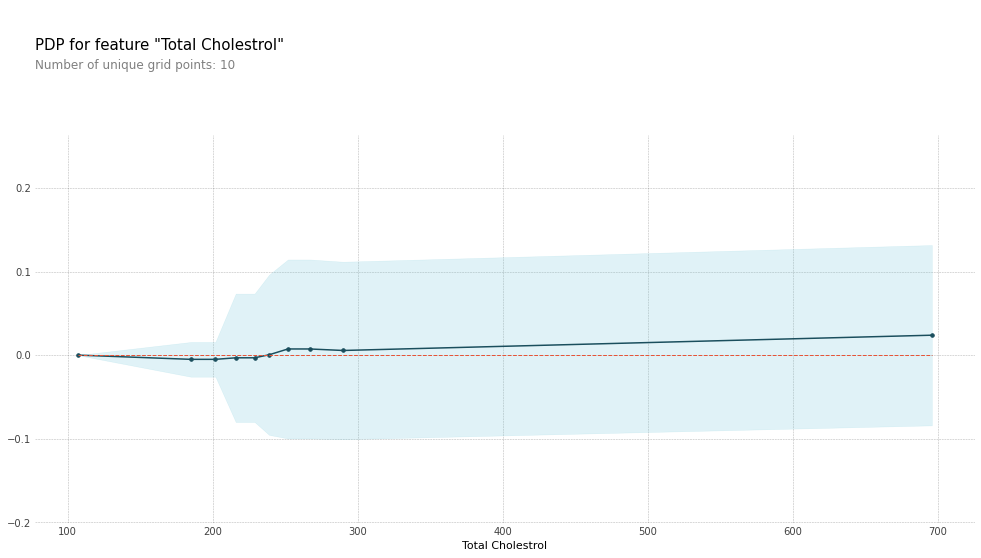

In [19]:
pdp.pdp_plot(pdp_totchol,'Total Cholestrol')

(<Figure size 1080x684 with 3 Axes>,
 {'pdp_ax': {'_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692b23add8>,
   '_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692b28c710>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692b2b9b38>})

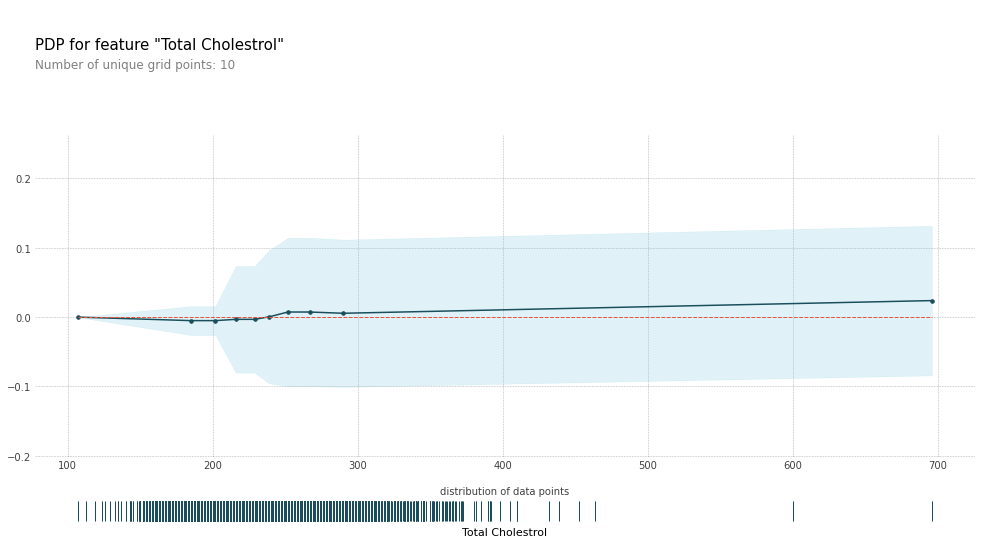

In [20]:
pdp.pdp_plot(pdp_totchol,'Total Cholestrol',plot_pts_dist=True)

(<Figure size 1080x684 with 4 Axes>,
 {'pdp_ax': {'_count_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692b136ba8>,
   '_pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692b1894e0>},
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f692b1bf978>})

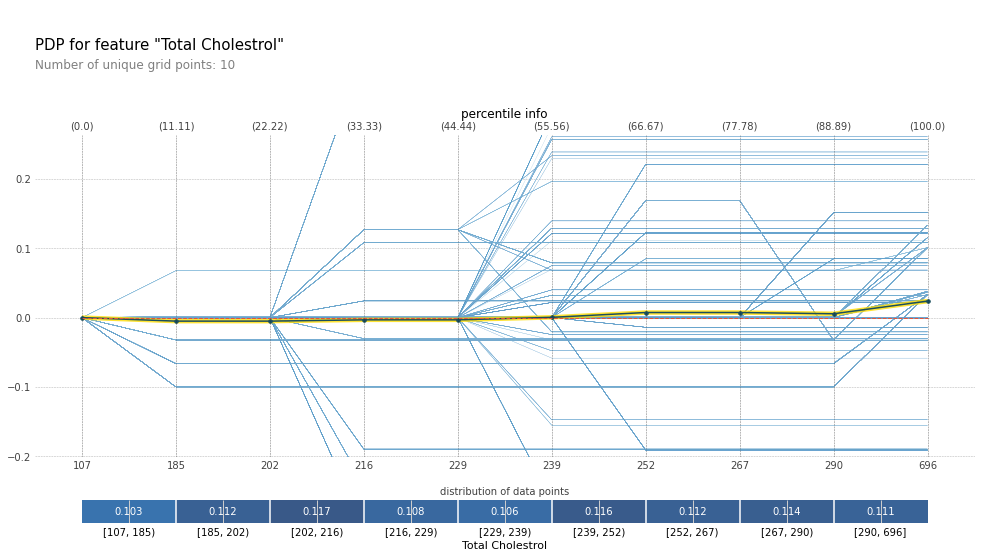

In [21]:
pdp.pdp_plot(pdp_totchol,
             'Total Cholestrol',
             plot_lines = True,
             x_quantile = True,
             plot_pts_dist=True,
             show_percentile = True)

# Shap

In [22]:
# load js visualize code to notebook
shap.initjs()

In [23]:
#visual row 3 
row_to_show = 3
data_for_prediction = x.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
dt.predict_proba(data_for_prediction_array)

array([[0.63333333, 0.36666667]])

In [0]:
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(data_for_prediction)

In [25]:
shap.initjs()
shap.force_plot(explainer.expected_value[1],shap_values[1],data_for_prediction)

In [26]:
#visual row 1000 
row_to_show = 800
data_for_prediction = x.iloc[row_to_show]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
dt.predict_proba(data_for_prediction_array)

array([[0.91666667, 0.08333333]])

In [0]:
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(data_for_prediction)

In [28]:
shap.initjs()
shap.force_plot(explainer.expected_value[0],shap_values[0],data_for_prediction)

In [0]:
explainer = shap.TreeExplainer(dt)
shap_value = explainer.shap_values(x)

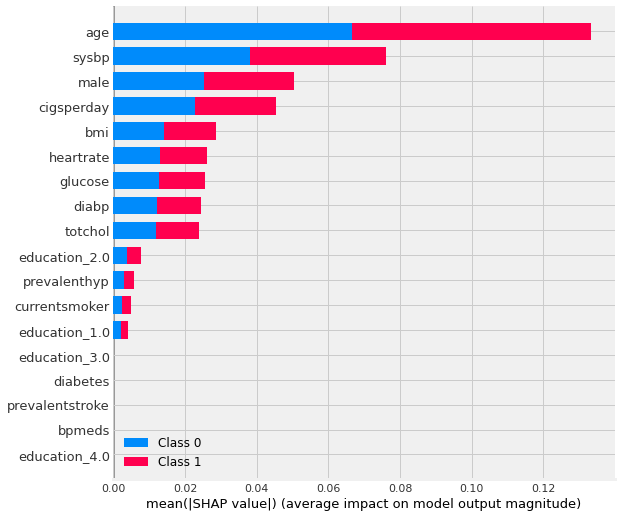

In [30]:
shap.initjs()
shap.summary_plot(
    shap_values = shap_value,
    features = x,
    feature_names = x.columns.to_list()
)

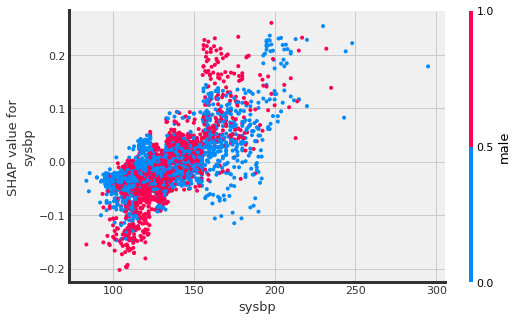

In [31]:
shap.dependence_plot('sysbp',shap_value[1],x)